In [1]:
import sys
sys.path.append('..')

In [2]:
import os
from natlutil.pos import Corpora, TaggerBuilder, Tagger

### Initial setup

Creates the folders to store the corpora and trained PoS taggers.  
Defines a function to evaluate and test the given PoS tagger.

In [3]:
data_folder = '../data/corpus'
model_folder = '../model/pos'

os.makedirs(data_folder, exist_ok=True)
os.makedirs(model_folder, exist_ok=True)

def evaluate_and_save(name, tagger):
    tagger.evaluate(corpora, filename=f'{model_folder}/{name}.pdf')
    tagger.save(f'{model_folder}/{name}.json')

### Corpora

Loads three corpora to train and evaluate the PoS Taggers:
 - [MacMorpho](http://nilc.icmc.usp.br/macmorpho/)
 - [Floresta](https://www.linguateca.pt/Floresta/)
 - [LacioWeb](http://www.nilc.icmc.usp.br/nilc/tools/nilctaggers.html)
 
Converts each of the corpus to the Universal Pos Tagset.

In [4]:
corpora = Corpora(['lacioweb', 'macmorpho', 'floresta'], '../data/corpus')

natlutil.postagging.LacioWeb: did not find the given corpus on NLTK
natlutil.postagging.LacioWeb: found corpus locally, there is no need to download it
natlutil.postagging.LacioWeb: reading corpus previously mapped to universal tagset
natlutil.postagging.MacMorpho: found corpus locally, there is no need to download it
natlutil.postagging.MacMorpho: reading corpus previously mapped to universal tagset
natlutil.postagging.Floresta: found corpus locally, there is no need to download it
natlutil.postagging.Floresta: reading corpus previously mapped to universal tagset


### DefaultTagger
Creates and evaluates the DefaultTagger using the default tag NOUN.

/home/alexandredias/.virtualenv/natlang/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


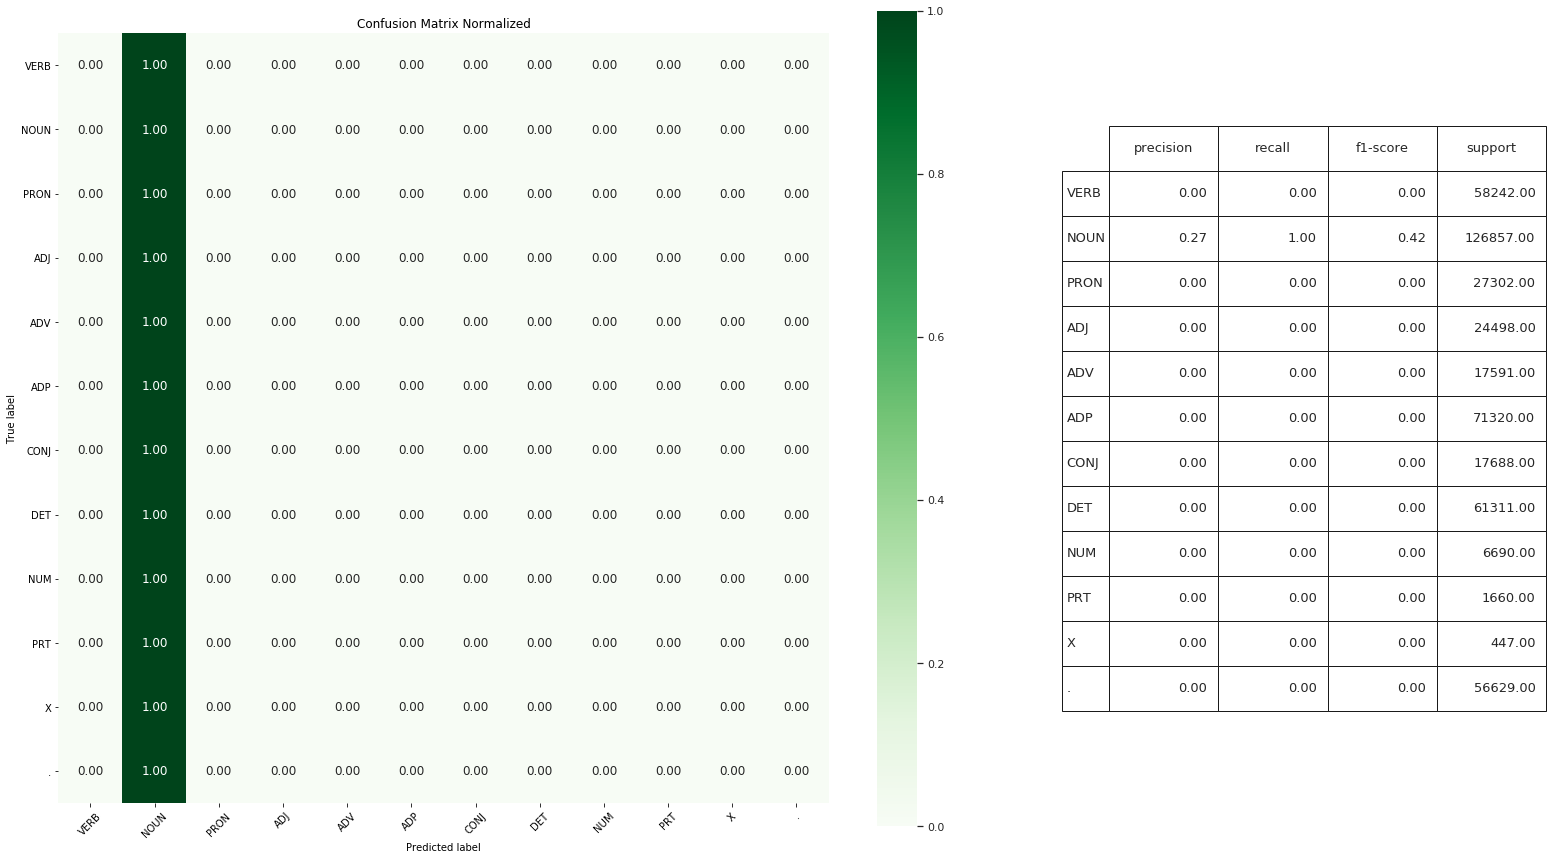

In [5]:
tagger = (
    TaggerBuilder(corpora, safe=False)
    .with_default()
    .get_result()
)
evaluate_and_save('default', tagger)

### UnigramTagger
Creates and evaluates the UnigramTagger using the DefaultTagger as a backoff.

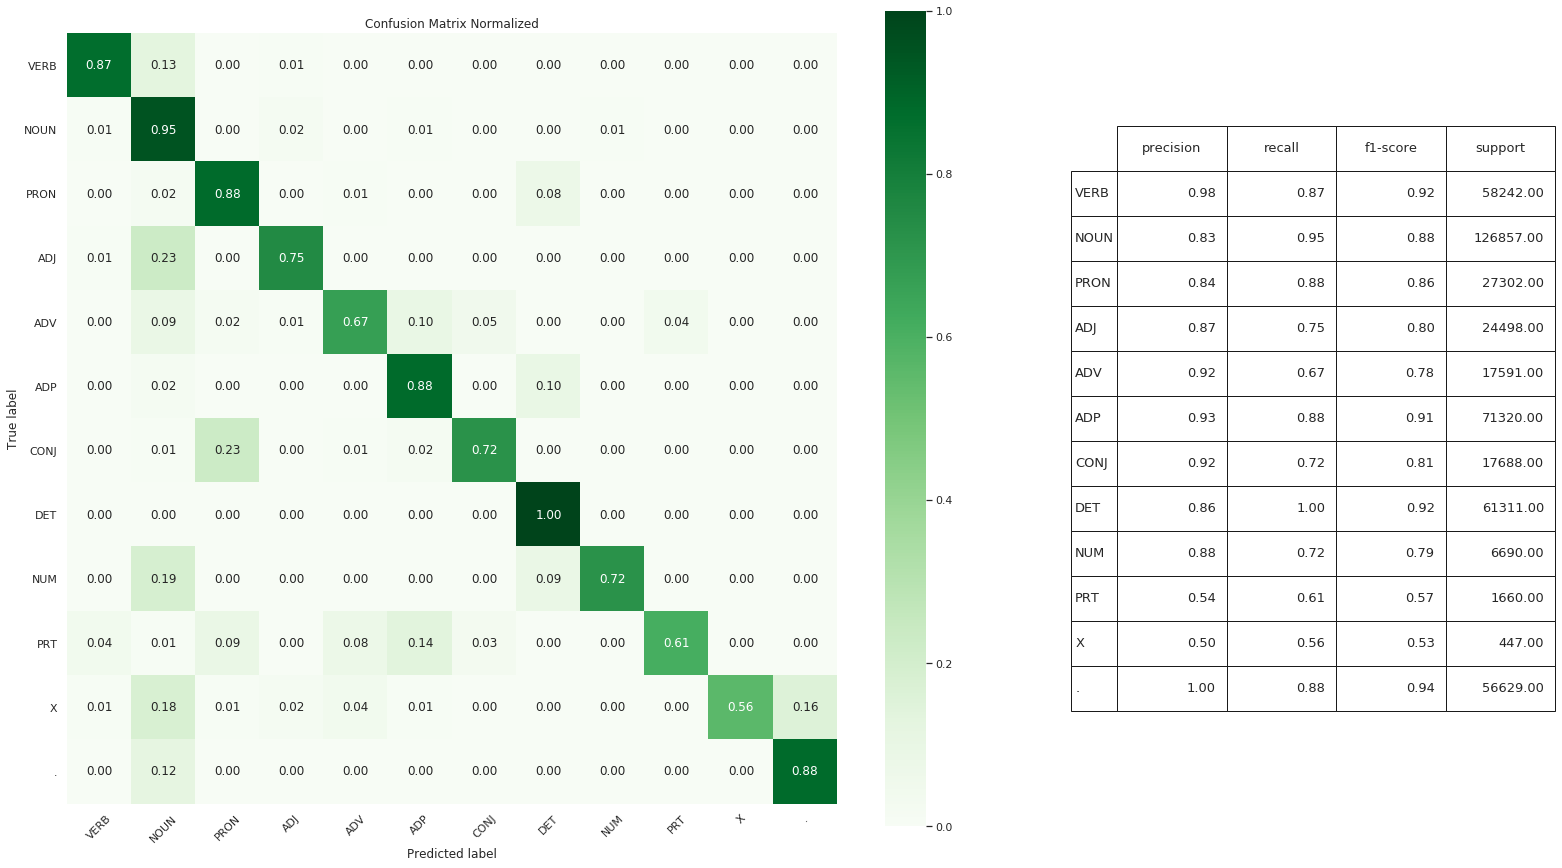

In [6]:
tagger = (
    TaggerBuilder(corpora, safe=False)
    .with_default()
    .with_unigram()
    .get_result()
)
evaluate_and_save('unigram', tagger)

### BigramTagger
Creates and evaluates the BigramTagger using the UnigramTagger as a backoff.

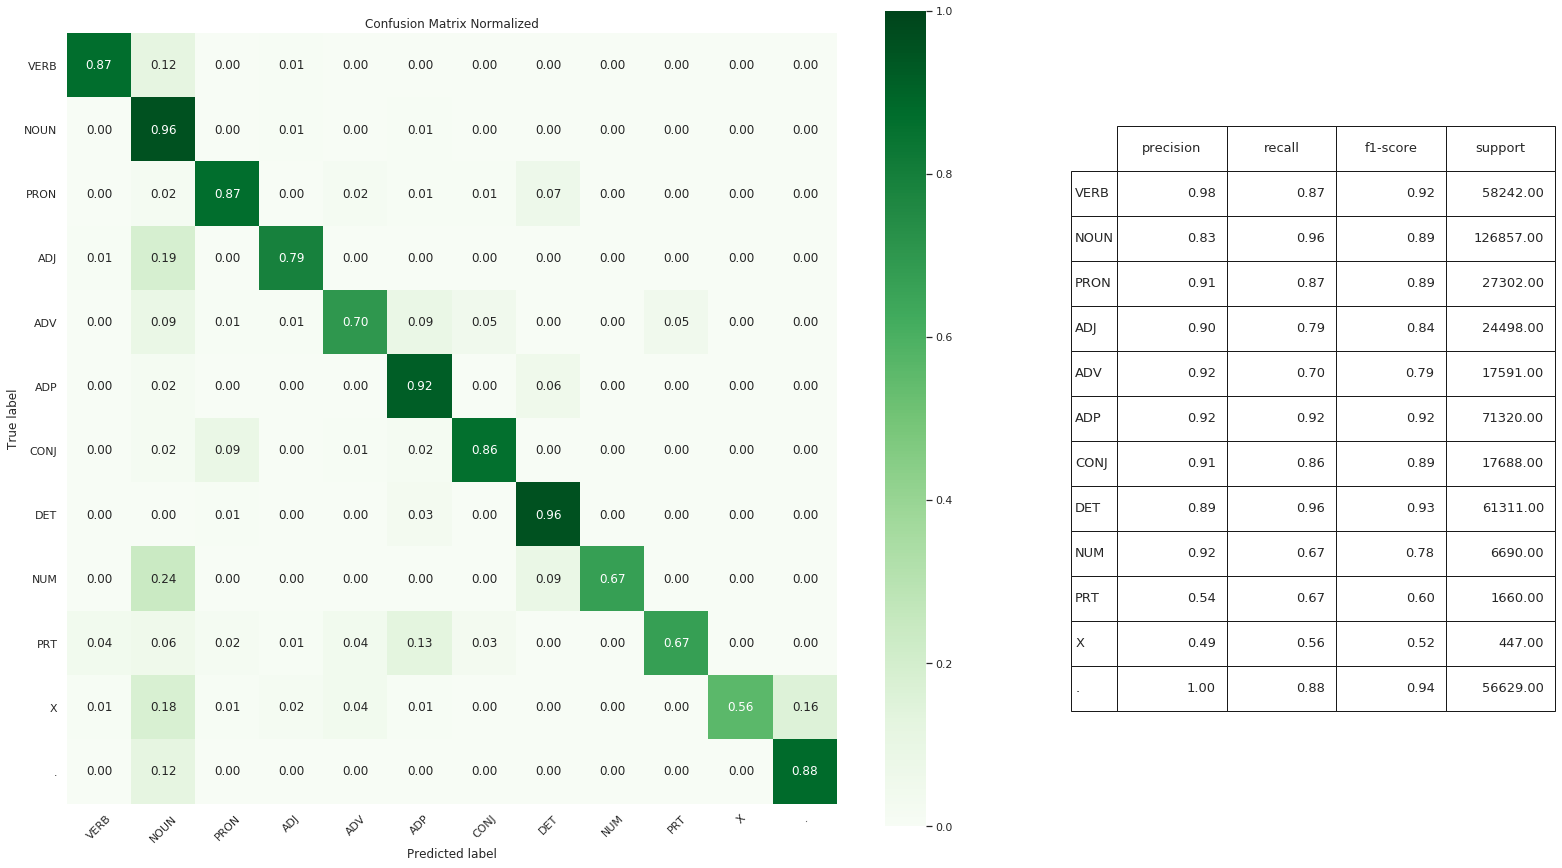

In [7]:
tagger = (
    TaggerBuilder(corpora, safe=False)
    .with_default()
    .with_unigram()
    .with_bigram()
    .get_result()
)
evaluate_and_save('bigram', tagger)

### TrigramTagger
Creates and evaluates the TrigramTagger using the BigramTagger as a backoff.

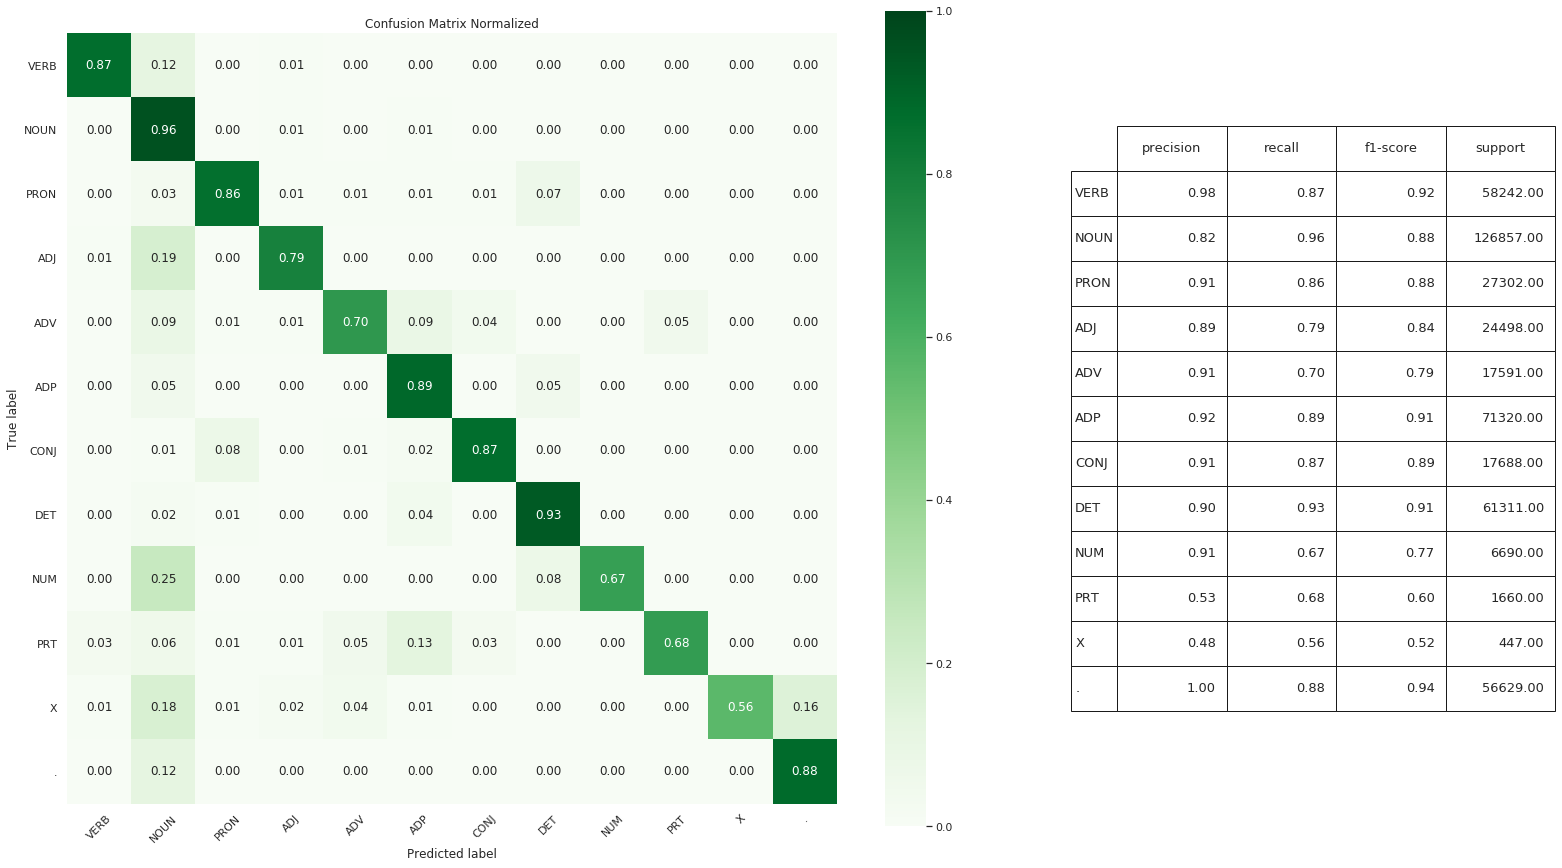

In [8]:
tagger = (
    TaggerBuilder(corpora, safe=False)
    .with_default()
    .with_unigram()
    .with_bigram()
    .with_trigram()
    .get_result()
)
evaluate_and_save('trigram', tagger)

### TrigramTagger + RegexpTagger
Creates and evaluates the TrigramTagger using the BigramTagger as a backoff. Includes the RegexpTagger in the sequence of backoff taggers, that only has a single regex for numbers.

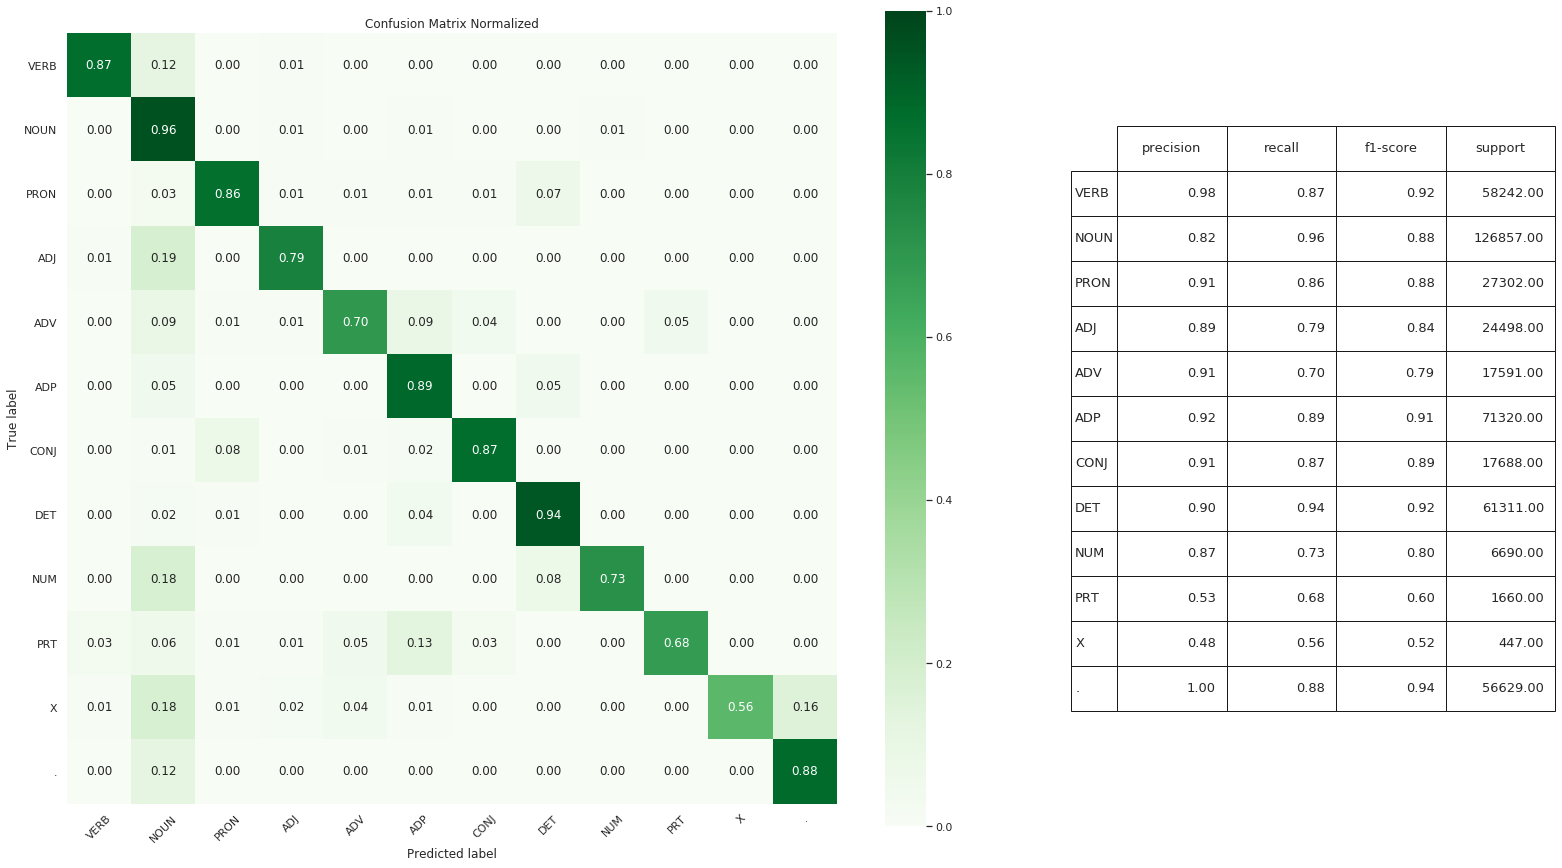

In [9]:
tagger = (
    TaggerBuilder(corpora, safe=False)
    .with_default()
    .with_regex()
    .with_unigram()
    .with_bigram()
    .with_trigram()
    .get_result()
)
evaluate_and_save('regex', tagger)

### TrigramTagger + RegexpTagger + AffixTagger
Creates and evaluates the TrigramTagger using the BigramTagger as a backoff. Includes the RegexpTagger and AffixTaggers in the sequence of backoff taggers.

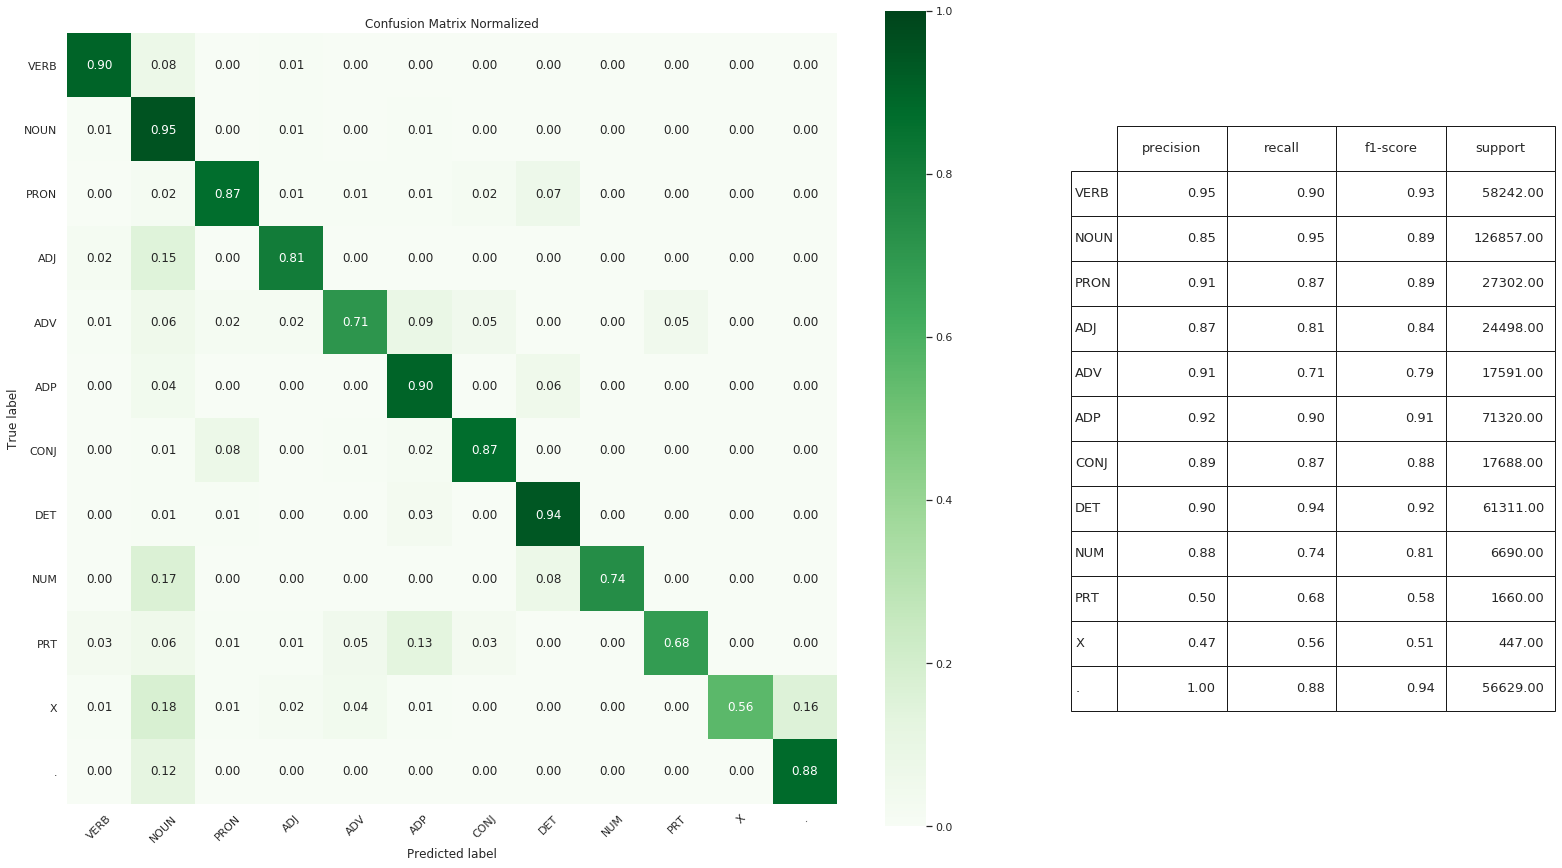

In [10]:
tagger = (
    TaggerBuilder(corpora, safe=False)
    .with_default()
    .with_regex()
    .with_affix()
    .with_unigram()
    .with_bigram()
    .with_trigram()
    .get_result()
)
evaluate_and_save('affix', tagger)

### 4-NgramTagger
Creates and evaluates the 4-NgramTagger using the TrigramTagger as a backoff.

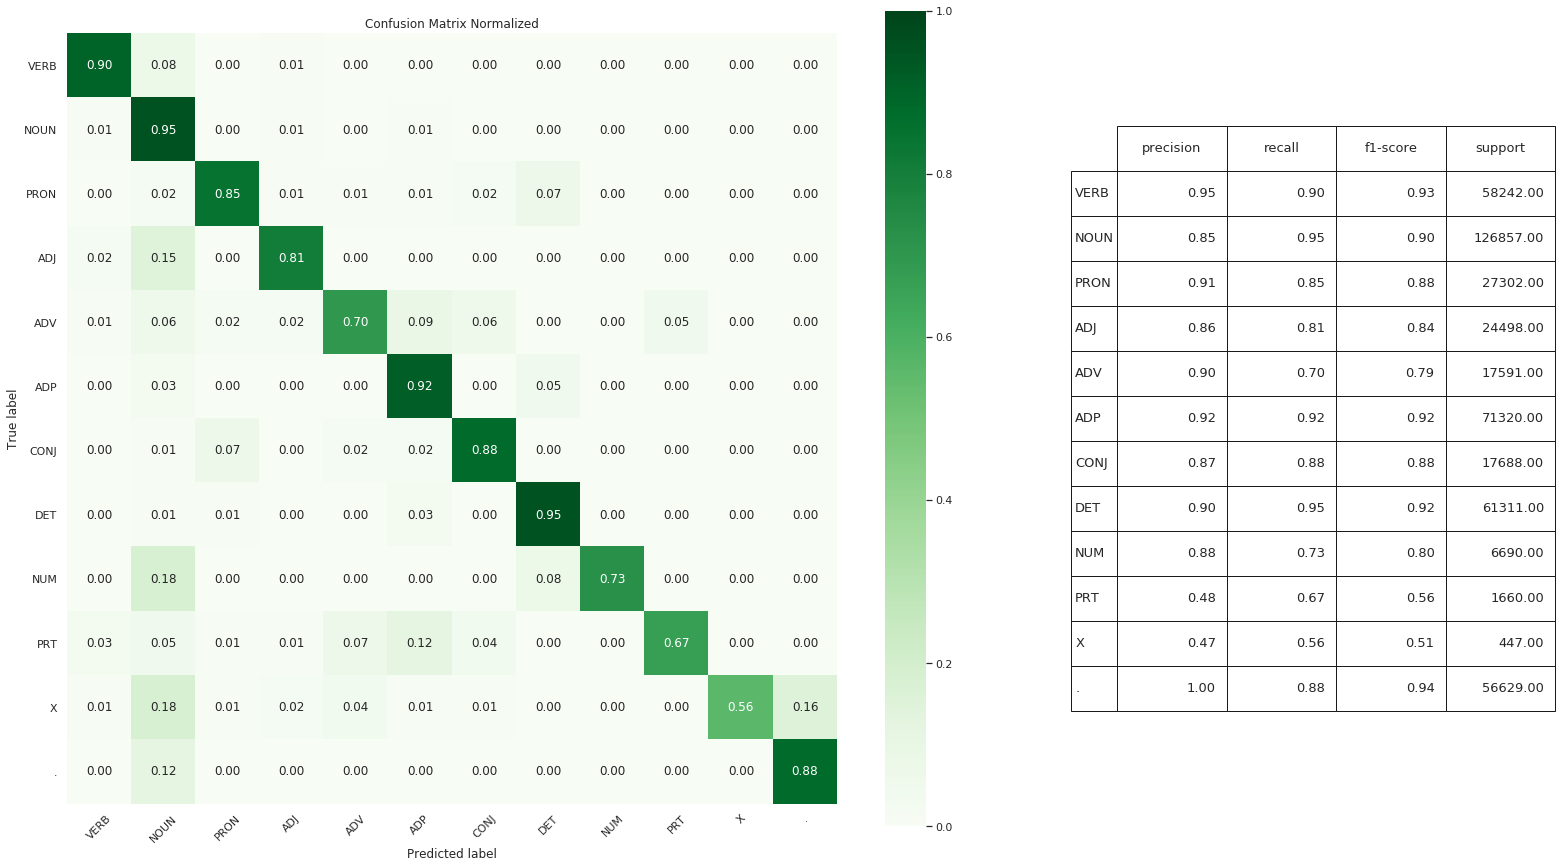

In [11]:
tagger = (
    TaggerBuilder(corpora, safe=False)
    .with_default()
    .with_regex()
    .with_affix()
    .with_unigram()
    .with_bigram()
    .with_trigram()
    .with_ngram(4)
    .get_result()
)
evaluate_and_save('4gram', tagger)

### 5-NgramTagger
Creates and evaluates the 5-NgramTagger using the 4-NgramTagger as a backoff.

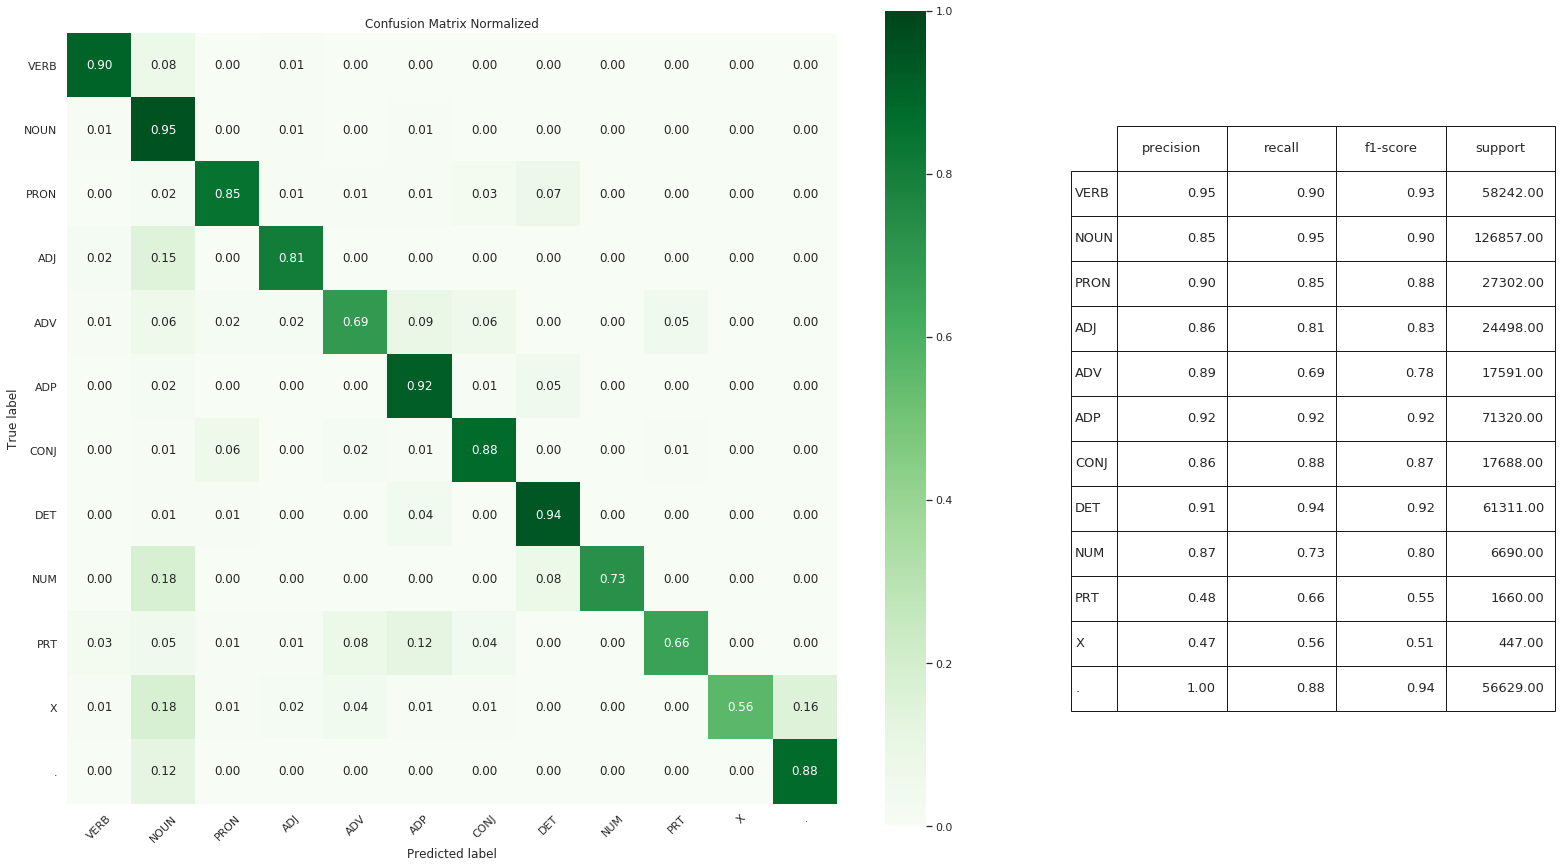

In [12]:
tagger = (
    TaggerBuilder(corpora, safe=False)
    .with_default()
    .with_regex()
    .with_affix()
    .with_unigram()
    .with_bigram()
    .with_trigram()
    .with_ngram(4)
    .with_ngram(5)
    .get_result()
)
evaluate_and_save('5gram', tagger)

### BrillTagger
Creates and evaluates the BrillTagger using the 5-NgramTagger as a backoff.

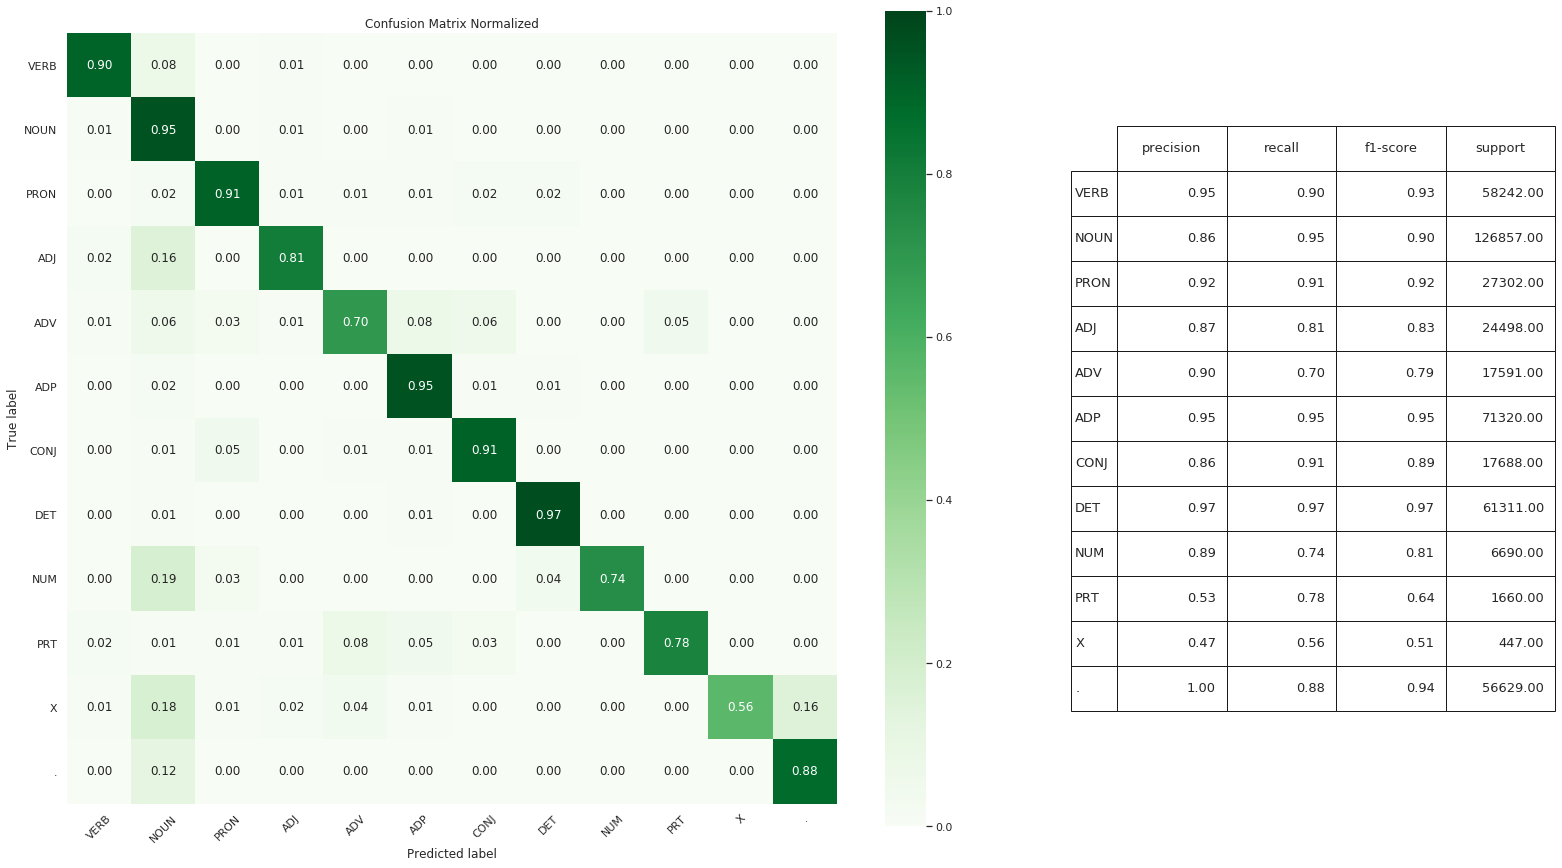

In [13]:
tagger = (
    TaggerBuilder(corpora, safe=False)
    .with_default()
    .with_regex()
    .with_affix()
    .with_unigram()
    .with_bigram()
    .with_trigram()
    .with_ngram(4)
    .with_ngram(5)
    .with_brill()
    .get_result()
)
evaluate_and_save('brill', tagger)

### PerceptronTagger
Creates and evaluates the PerceptronTagger alone.

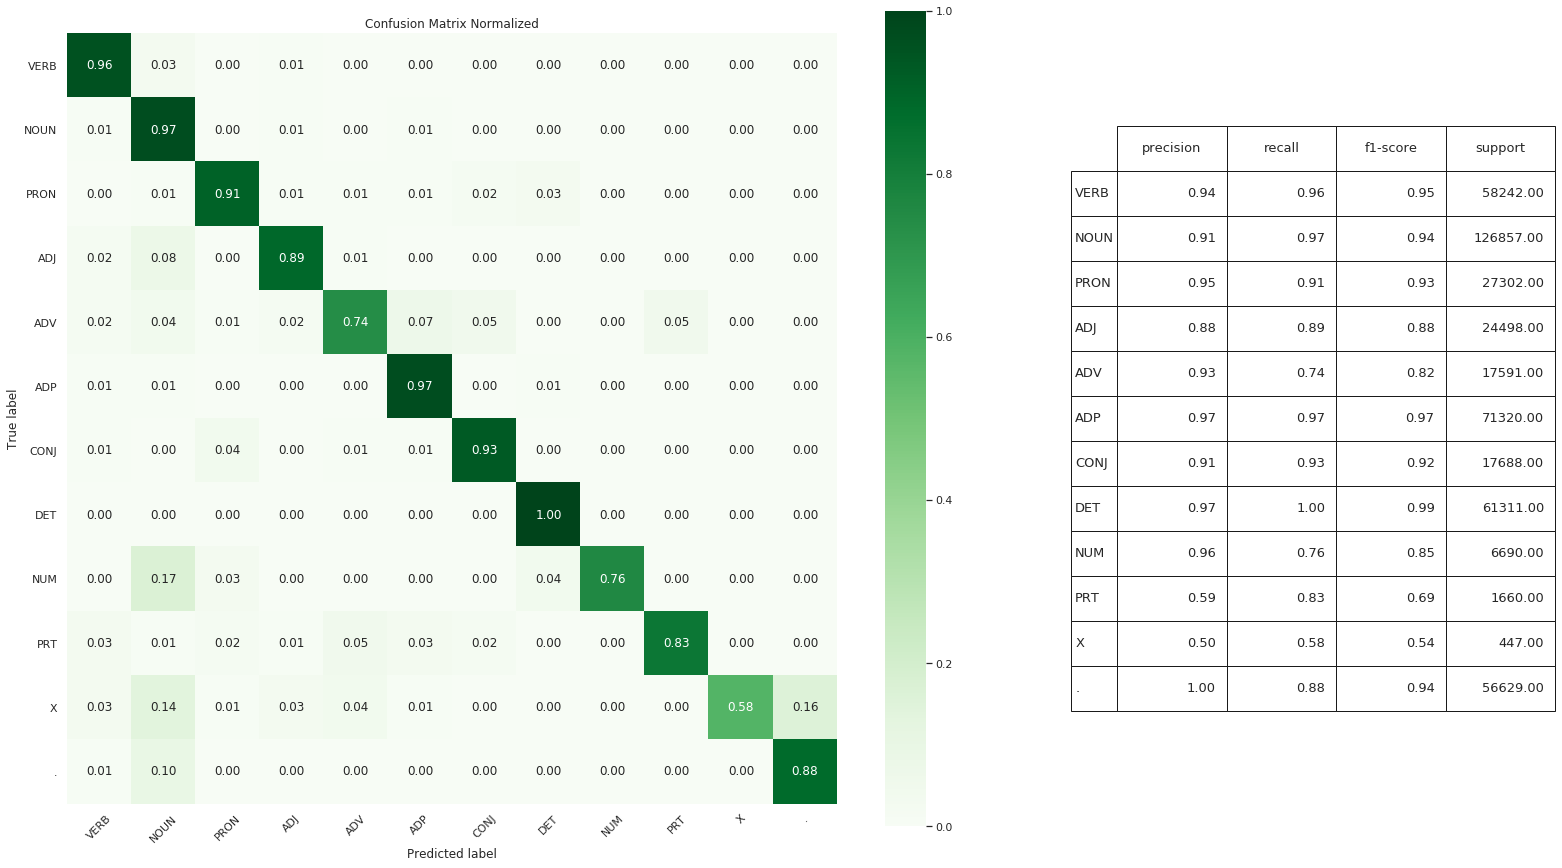

In [14]:
tagger = (
    TaggerBuilder(corpora, safe=False)
    .with_perceptron()
    .get_result()
)
evaluate_and_save('perceptron', tagger)

### PerceptronTagger + BrillTagger
Creates and evaluates the BrillTagger using the PerceptronTagger as the initial tagger.

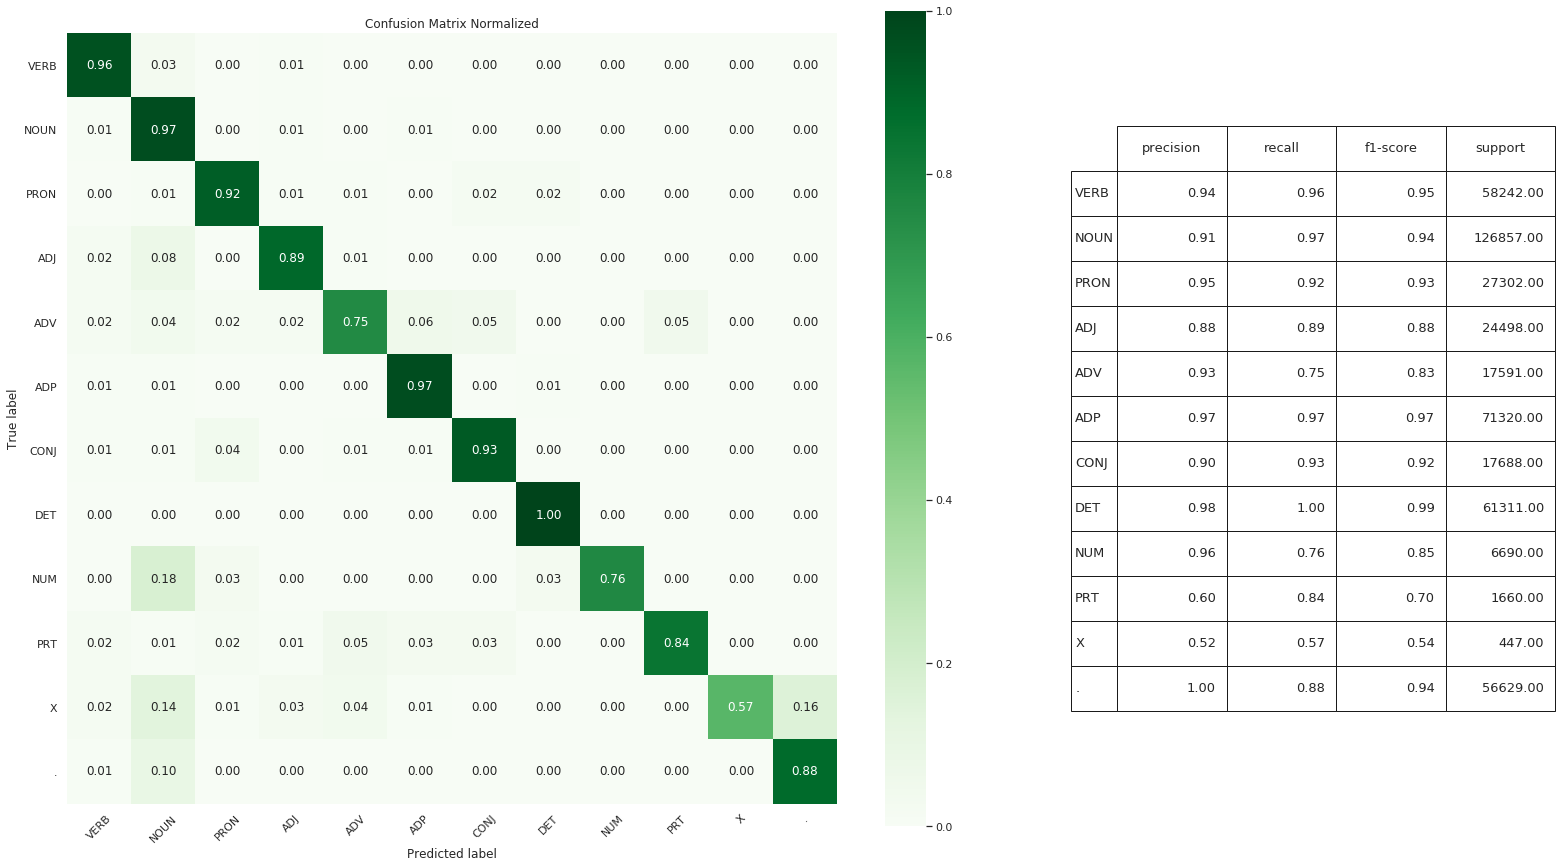

In [15]:
tagger = (
    TaggerBuilder(corpora, safe=False)
    .with_perceptron()
    .with_brill()
    .get_result()
)
evaluate_and_save('perceptron_brill', tagger)